In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
folder = '../../measurements/D1002969_transimpedence/'

In [4]:
def sort_SR785(filename):
    file = np.loadtxt(filename,delimiter='\n',dtype='str')
    title_header = 1
    header_len = 10
    first_header = title_header + header_len
    amp_meta = file[:first_header]
    num_points = int(amp_meta[5][19:22])
    phase_meta = file[0:(first_header + num_points)]
    amp_full = [i.split('\t') for i in file[first_header:num_points]]
    freq_amp = np.array([amp_full[i][0] for i in range(len(amp_full))]).astype(float)
    amp_data = np.array([amp_full[i][1] for i in range(len(amp_full))]).astype(float)
    phase_full = [i.split('\t')for i in file[(2*header_len)+num_points:(2*header_len) + (2*num_points)]]
    freq_ph = np.array([phase_full[i][0] for i in range(len(phase_full))]).astype(float)
    phase_data = np.array([phase_full[i][1] for i in range(len(phase_full))]).astype(float)
    return {'amplitude' :(freq_amp, amp_data,amp_meta), 'phase' :(freq_ph, phase_data,phase_meta)}

In [5]:
PD_labels = np.array(['256', '259', '255'])

In [6]:
file = [folder + i + '/' + i + '_RF.TXT' for i in PD_labels]

In [7]:
data = [sort_SR785(i) for i in file]

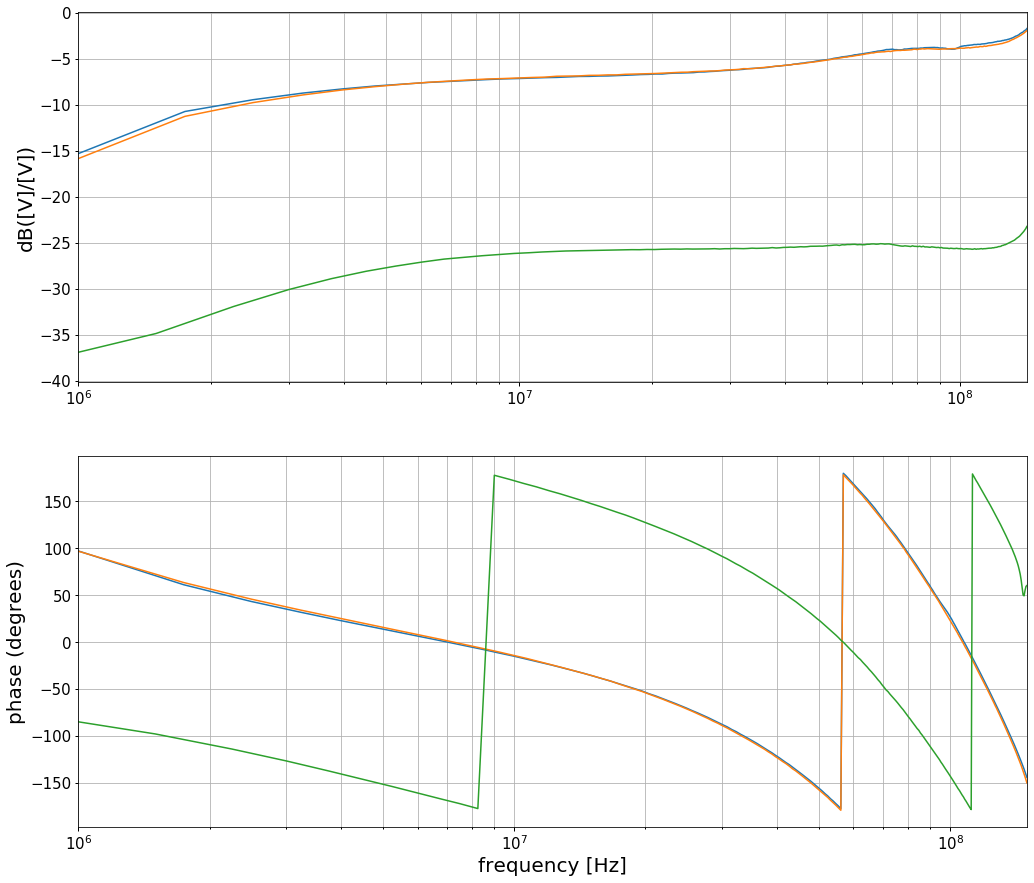

In [8]:
fig = plt.figure(figsize=(17,15))
plt.subplot(211)
for i in range(len(PD_labels)):
    plt.plot(data[i]['amplitude'][0],data[i]['amplitude'][1],label='S1200'+PD_labels[i])

ax = plt.gca()
plt.ylabel('dB',fontsize=20)
plt.grid('True', which='both')
plt.grid('True')
ax.tick_params(which='both', width=1)
ax.tick_params(which='minor', length=2)
ax.tick_params(labelsize=15)
ax.yaxis.offsetText.set_fontsize(15)
plt.xlim([data[0]['amplitude'][0][0],data[0]['amplitude'][0][-1]])
ax.set_xscale('log')
plt.subplot(212)
for i in range(len(PD_labels)): 
    plt.plot(data[i]['phase'][0],data[i]['phase'][1],label='S1200'+PD_labels[i])
    
ax = plt.gca()
plt.ylabel('phase (degrees)',fontsize=20)
plt.grid('True', which='both')
plt.grid('True')
ax.tick_params(which='both', width=1)
ax.tick_params(which='minor', length=2)
ax.tick_params(labelsize=15)
ax.yaxis.offsetText.set_fontsize(15)
plt.xlabel('frequency [Hz]',fontsize=20)
plt.xlim([data[1]['phase'][0][0],data[1]['phase'][0][-1]])
ax.set_xscale('log')

In [9]:
#Converting from dB to transimpedence
inj_resistor = 10e3
transimp = [inj_resistor*10**(data[i]['amplitude'][1]/20) for i in range(len(PD_labels))]

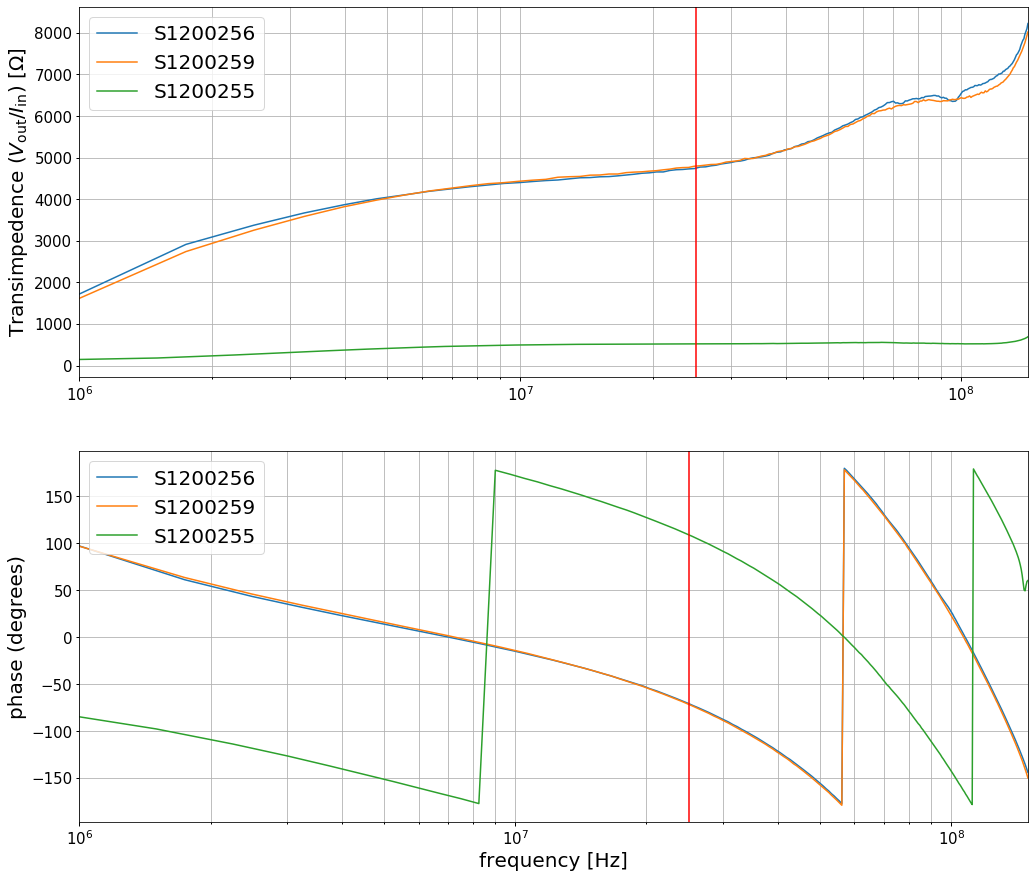

In [14]:
fig = plt.figure(figsize=(17,15))
plt.subplot(211)
for i in range(len(PD_labels)): 
    plt.plot(data[i]['amplitude'][0],transimp[i],label='S1200'+ PD_labels[i])
plt.axvline(x=25e6,color='r')
ax = plt.gca()
plt.ylabel('Transimpedence ($V_\mathrm{out}$/$I_\mathrm{in}$) [$\Omega$]',fontsize=20)
plt.grid('True', which='both')
plt.grid('True')
ax.tick_params(which='both', width=1)
ax.tick_params(which='minor', length=2)
ax.tick_params(labelsize=15)
ax.yaxis.offsetText.set_fontsize(15)
plt.xlim([data[0]['amplitude'][0][0],data[0]['amplitude'][0][-1]])
ax.set_xscale('log')
plt.legend(prop={'size':20})

plt.subplot(212)
for i in range(len(PD_labels)): 
    plt.plot(data[i]['phase'][0],data[i]['phase'][1],label='S1200'+PD_labels[i])
ax = plt.gca()
plt.ylabel('phase (degrees)',fontsize=20)
plt.axvline(x=25e6,color='r')
plt.grid('True', which='both')
plt.grid('True')
ax.tick_params(which='both', width=1)
ax.tick_params(which='minor', length=2)
ax.tick_params(labelsize=15)
ax.yaxis.offsetText.set_fontsize(15)
plt.xlabel('frequency [Hz]',fontsize=20)
plt.xlim([data[1]['phase'][0][0],data[1]['phase'][0][-1]])
ax.set_xscale('log')
plt.legend(prop={'size':20})
plt.savefig(folder+'RF_transimpedence.png',dpi=300,bbox_inches='tight')

In [11]:
print('At {} Hz the transimpedence is {} [Ohms]'.format(freq[34],transimp[34]))

NameError: name 'freq' is not defined